<h2>Decision Tree</h2>

A non-parametric, flow-chart-like tree structure. 
- Non-parametric: the model does not use a specific equation to estimate the target
- Tree structure: 
    - The model starts with a root node that represents the whole dataset
    - From the root node, split the data into multiple portions based on a condition. The split forms new nodes that is a subset of the data. 
    - Continuously split the new nodes until there is no further needs of splitting
    - Nodes without splits are called leaf nodes. Predictions of the target are made here.

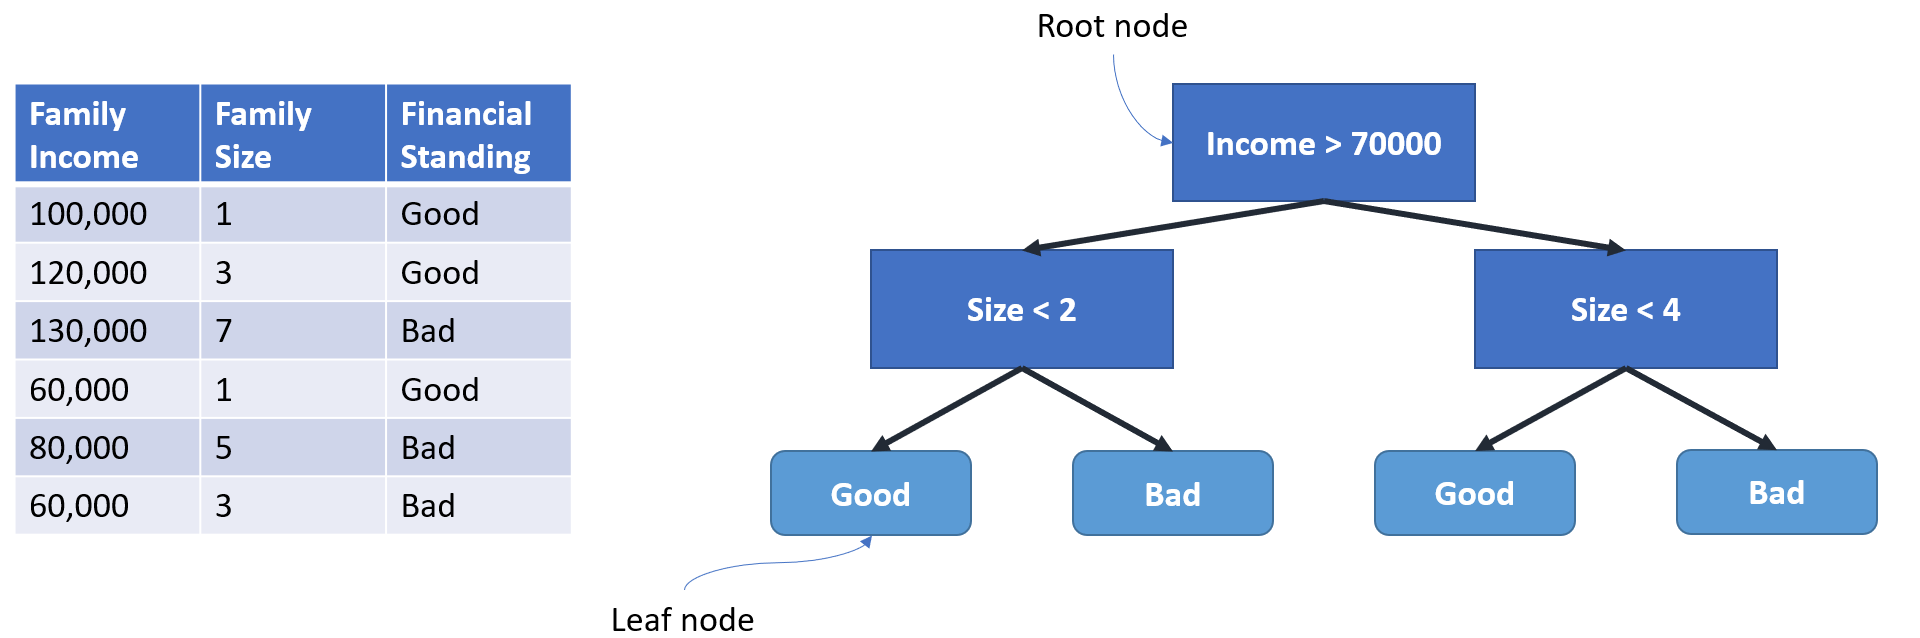

An illustration of how the tree split the given data is as below

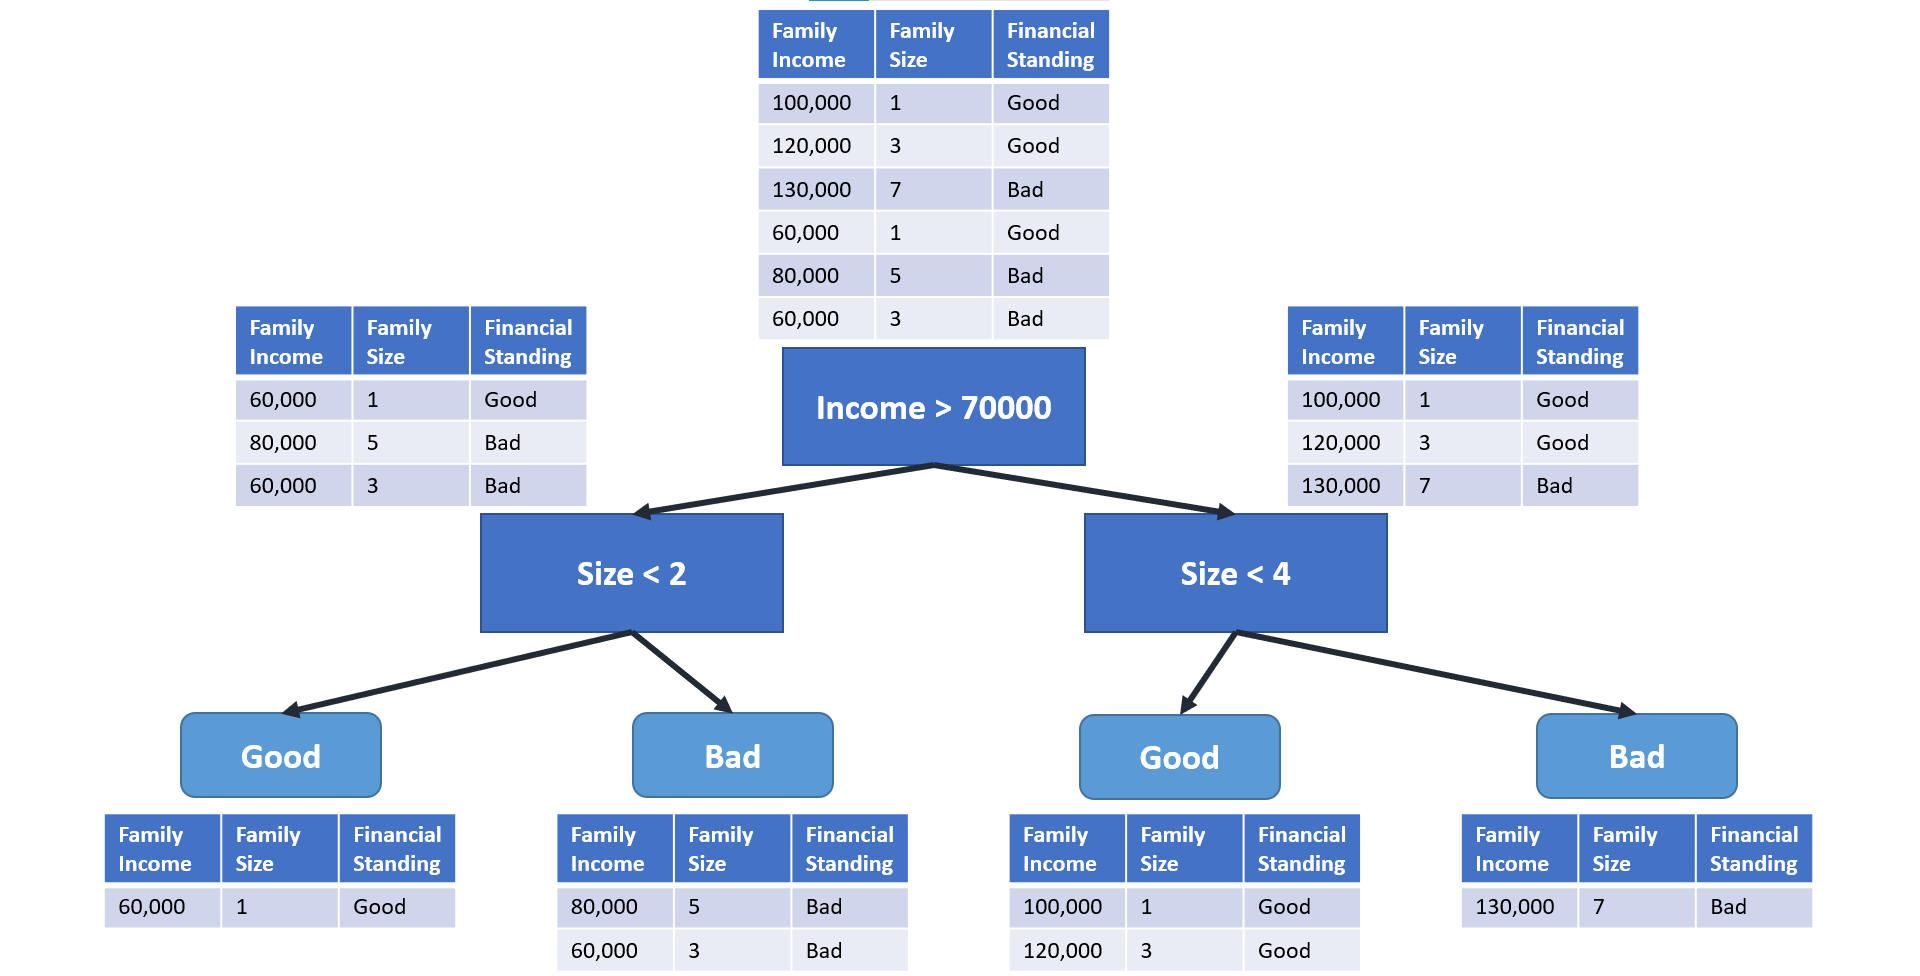

Trees are not unique. A task on a dataset may have multiple trees that can solve it

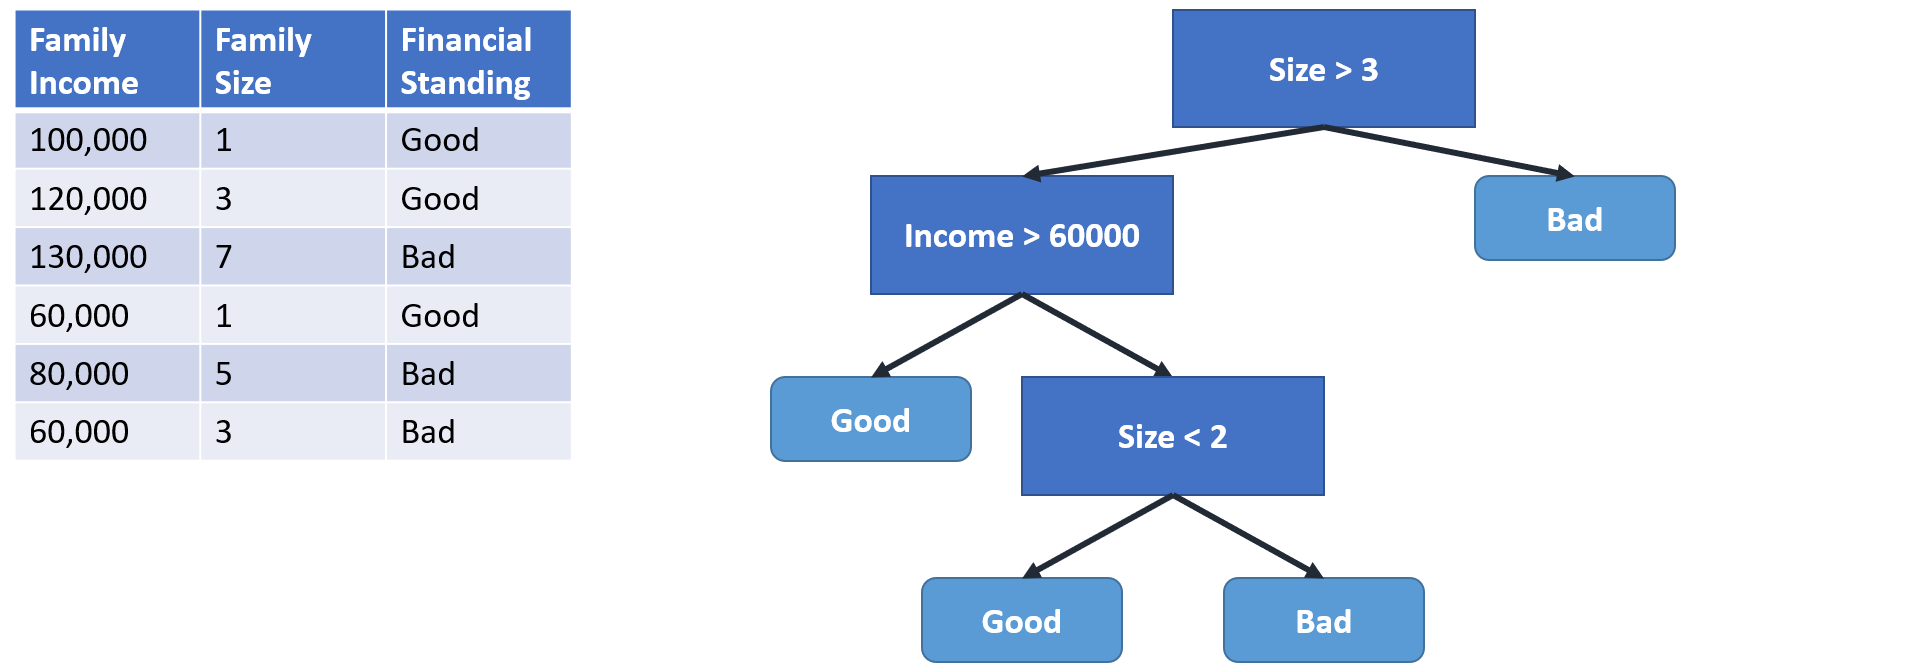

<h3>Toy Examples</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
X = np.array([1.5,1.2,1.6,1.3,1.7,1.1,2.1,2.9,2.5,2.8,2.3,2.4])
Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

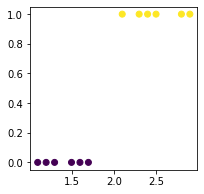

In [7]:
#and visualize them
#colors will represent the two classes in this case
plt.figure(figsize=(3,3))
plt.scatter(X, Y, c=Y)
plt.show()

In [8]:
#now fit a decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X.reshape(-1,1),Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We can visualize a tree in SKLearn very easily

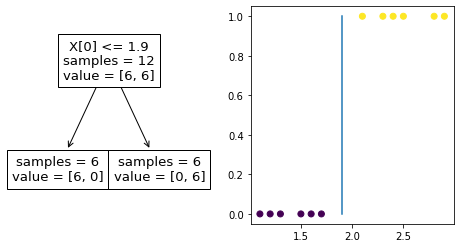

In [9]:
#we use the plot_tree() function from sklearn.tree
from sklearn.tree import plot_tree

#the function takes input as a trained decision tree
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_tree(dt, impurity=False)
plt.subplot(122)
plt.scatter(X, Y, c=Y)
plt.plot([1.9,1.9],[0,1]) #draw the decision boundary of the split
plt.show()

More complicated example

In [11]:
X = np.array([
    [1.5,1.1],[1.2,1.3],[1.6,1.2],[1.3,2.4],[1.7,2.1],[1.1,2.5],
    [2.1,1.5],[2.9,1.2],[2.5,1.7],[2.8,2.7],[2.3,2.9],[2.4,3.0]])

Y = np.array([0,0,0,1,1,1,1,1,1,0,0,0])

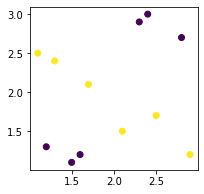

In [12]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

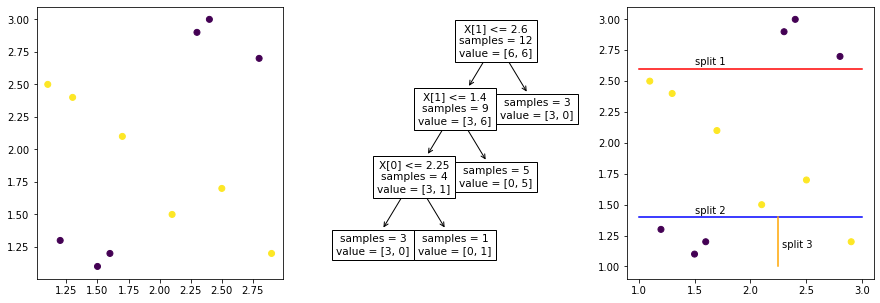

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.subplot(132)
plot_tree(dt, impurity=False)
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot([1,3],[2.6,2.6],c='red')
plt.text(1.5,2.63,'split 1')
plt.plot([1,3],[1.4,1.4],c='blue')
plt.text(1.5,1.43,'split 2')
plt.plot([2.25,2.25],[1,1.4],c='orange')
plt.text(2.28,1.15,'split 3')
plt.show()

<h4>Gini Index</h4>

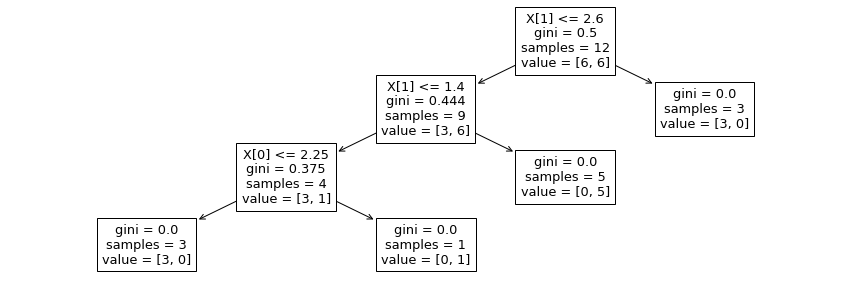

In [15]:
plt.figure(figsize=(15,5))
plot_tree(dt) 
plt.show()

Gini index is one of the impurity measurements that is used to evaluate a node

$I = 1 - \sum_{c} p_c^2$

$c$ is each of the classes

Example:

- at root node, each classes has 6 instances, so each has $p=0.5$. $I_{root} = 1 - (0.5^2 + 0.5^2) = 0.5$
- at the node of 2nd split, class 1 has 3 instances, class 2 has 6 instances, so $p_1 = 0.333$, $p_2 = 0.667$, $I = 1 - (0.333^2 + 0.667^2) = 0.444$
- at the node of 3rd split, class 1 has 3 instances, class 2 has 1 instance, $p_1 = 0.75$, $p_2 = 0.25$, $I = 1 - (0.75^2 + 0.25^2) = 0.375$
- at any of the leaf node, only one class remaining, so $I = 0$

At each step, the tree seeks a split that result in the minimum gini index overall. This is how a decision tree is trained.

<h4> Applied on the Heart Disease Data </h4>

Now let's try decision tree on the heart disease data. As usual, we preprocess the data first

In [16]:
data = pd.read_csv('heart_disease.csv')

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

num_cols = trainX.columns[(trainX.dtypes == np.int64) | (trainX.dtypes == np.float64)]

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

from sklearn.preprocessing import OneHotEncoder

#get a list of class columns
cat_cols = trainX.columns[trainX.dtypes==object]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)  

trainX_prc.shape, testX_prc.shape

((734, 20), (184, 20))

Let's see how the default tree performs

In [24]:
dt = DecisionTreeClassifier()
dt.fit(trainX_prc,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
print('training accuracy:',dt.score(trainX_prc, trainY))
print('testing accuracy:',dt.score(testX_prc, testY))

training accuracy: 1.0
testing accuracy: 0.7989130434782609


The tree overfits the data. We can also look at the tree visualization which is overly complicated

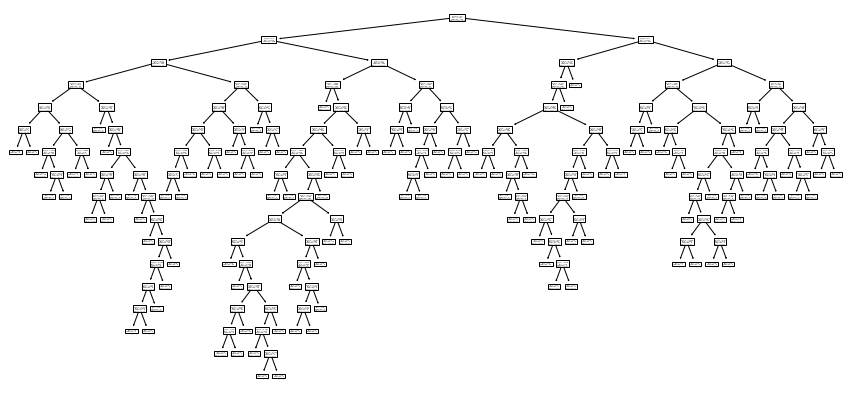

In [28]:
plt.figure(figsize=(15,7))
plot_tree(dt)
plt.show()

Overall, decision trees will overfit data very easily without finetuning. Important hyperparamters to tune:
- max_depth: maximum depth of the tree. The tree on the right has a depth of 3. Depth represents the maximum distance (number of paths) between the root node and a leaf node.
- min_samples_split: minimum number of instances required to split an internal node. For example, if the number of instances ending up in the TaxInc is smaller than the min_sample_split, the node will not be split further
- min_samples_leaf: minimum number of samples required to be at a leaf node. A split point will only be considered if it leaves at least min_samples_leaf training instances in each of the left and right branches. 
- max_features: maximum number of features to consider when looking for the best split|

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [5, 10, 15],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 4, 5, 6],
                         

Decision tree is actually quite unstable - if you rerun the finetuning below multiple times, you may get different performances.

Best training model:

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 40}
0.8446277140993385


In [22]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_prc, testY)

0.842391304347826

Let's also visualize the tree. We can see it is much simpler now. Furthermore, the tree actually uses only several features from the training data but still acquires a very high accuracy.

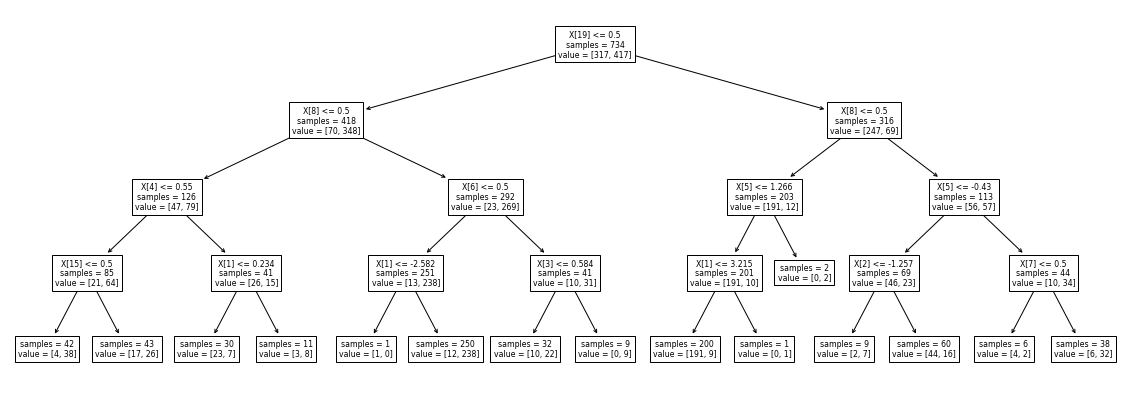

In [23]:
plt.figure(figsize=(20,7)) #setting figure size
plot_tree(best_dt, impurity=False) 
plt.show()

<h4>Summarize all Results</h4>

Compared to other models so far:

|Model|Training CV Accuracy| Testing Accuracy|
|-----|--------------------|-----------------|
|No Regularization|0.834|0.850|
|L2 Regularization|0.857|0.861|
|L1 Regularization|0.861|0.861|
|ENet Regularization|0.863|0.861|
|L1 Linear SVM|0.851|0.861|
|L2 Linear SVM|0.853|0.873|
|Kernel SVM|0.872|0.867|
|Decision Tree|0.858|0.867|

As you can see, decision tree' performance is quite good while using very low number of features.

<h3> For Regression </h3>

Decision tree also works for regression tasks. We will use DecisionTreeRegressor instead. Tuning decision trees for regression is identical to tuning their classification variants. Let's revisit the auto-mpg data

In [29]:
auto = pd.read_csv('auto-mpg.csv')

from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(auto):
    train_set = auto.loc[train_index]
    test_set = auto.loc[test_index]
    
trainX = train_set.drop('mpg',axis=1)
trainY = train_set['mpg']
testX = test_set.drop('mpg',axis=1)
testY = test_set['mpg']

trainX.shape, testX.shape, trainY.shape, testY.shape

((298, 7), (100, 7), (298,), (100,))

In [30]:
#pipeline for numeric features
#we need to impute horsepower
num_cols = trainX.columns[:-1] #because the last column is class
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

#pipeline for class features
cat_cols = trainX.columns[-1:] #because the last column is class
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

#full pipeline - combine numeric and class pipelines
full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)

trainX_prc.shape

(298, 9)

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [5, 7, 9],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [5, 7, 9],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
        

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 20}
0.8123588294433841


In [33]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_prc, testY)

0.837302840298146

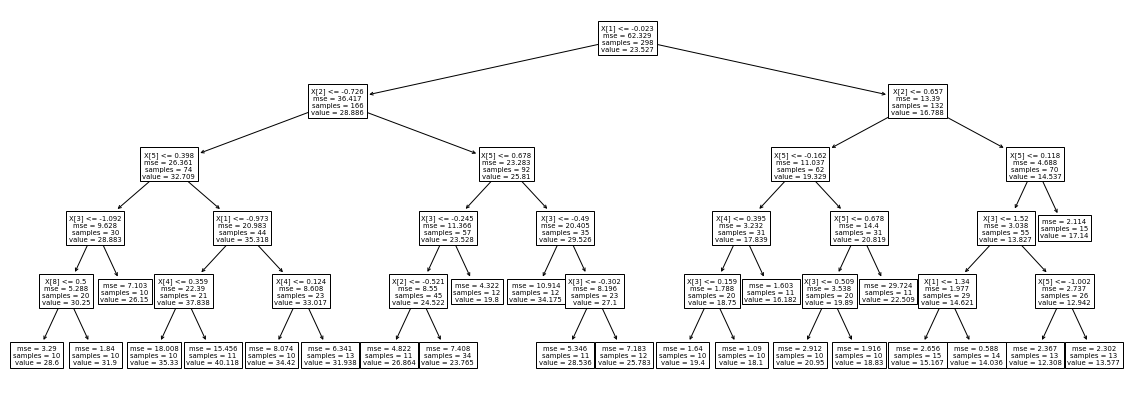

In [35]:
plt.figure(figsize=(20,7)) #setting figure size
plot_tree(best_dt) 
plt.show()

You can also visualize the tree if you like. I would leave that for practice. Finally, we can summarize the results of all models so far

|Model|Training CV R2| Testing R2|
|-----|--------------|-----------|
|Ridge|0.852         |0.893      |
|LASSO|0.851         |0.895      |
|ENet |0.851         |0.895      |
|SVR  |0.864         |0.905      |
|DTR  |0.823         |0.867      |

In this data, decision tree is not a very good model. Its performance is the lowest in both CV training and testing.

In general, decision tree can be very powerful, but also more difficult to use because of the overfitting and stability problem. For that reason, we usually prefer random forest models.